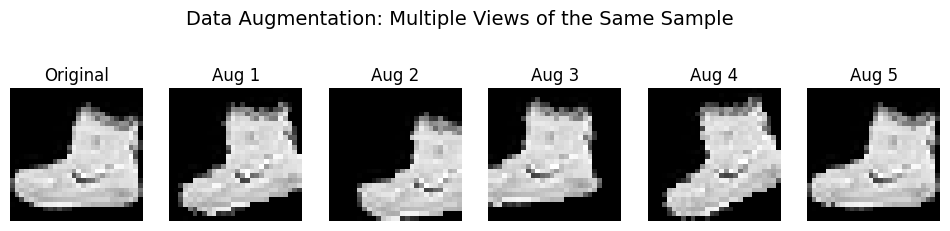

In [6]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST

# Load FashionMNIST sample
dataset = FashionMNIST(root="./data", train=True, download=True)
img, label = dataset[0]  # take first image

# Define augmentations
augmentations = transforms.Compose([
    transforms.RandomChoice([
        transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.RandomAffine(degrees=15, translate=(0.2, 0.2)),
        transforms.RandomCrop(size=(28, 28), padding=4),
    ])
])

# Generate augmented samples
fig, axes = plt.subplots(1, 6, figsize=(12, 3))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

for i in range(1, 6):
    augmented = augmentations(img)
    axes[i].imshow(augmented, cmap="gray")
    axes[i].set_title(f"Aug {i}")
    axes[i].axis("off")

plt.suptitle("Data Augmentation: Multiple Views of the Same Sample", fontsize=14)
plt.show()


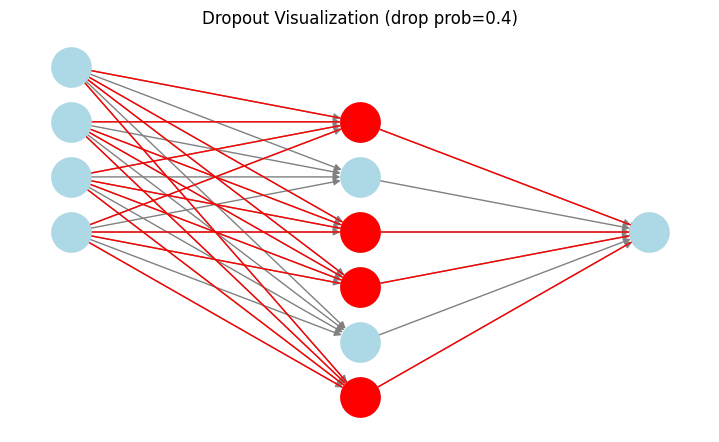

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_dropout(drop_prob=0.3):
    G = nx.DiGraph()
    input_nodes = [f"x{i}" for i in range(4)]
    hidden_nodes = [f"h{i}" for i in range(6)]
    output_nodes = ["y"]

    # Build connections
    for x in input_nodes:
        for h in hidden_nodes:
            G.add_edge(x, h)
    for h in hidden_nodes:
        for y in output_nodes:
            G.add_edge(h, y)

    # Assign positions
    pos = {}
    for i, x in enumerate(input_nodes):
        pos[x] = (0, i)
    for i, h in enumerate(hidden_nodes):
        pos[h] = (1, i - len(hidden_nodes)/2)
    pos["y"] = (2, 0)

    plt.figure(figsize=(7, 4))
    nx.draw(G, pos, with_labels=False, node_size=800, node_color="lightblue", edge_color="gray")

    # Apply dropout mask
    mask = np.random.rand(len(hidden_nodes)) > drop_prob
    for i, h in enumerate(hidden_nodes):
        if not mask[i]:
            nx.draw_networkx_nodes(G, pos, nodelist=[h], node_color="red", node_size=800)
            nx.draw_networkx_edges(G, pos, edgelist=[(u, h) for u in input_nodes], edge_color="red")
            nx.draw_networkx_edges(G, pos, edgelist=[(h, "y")], edge_color="red")

    plt.title(f"Dropout Visualization (drop prob={drop_prob})")
    plt.axis("off")
    plt.show()

plot_dropout(0.4)


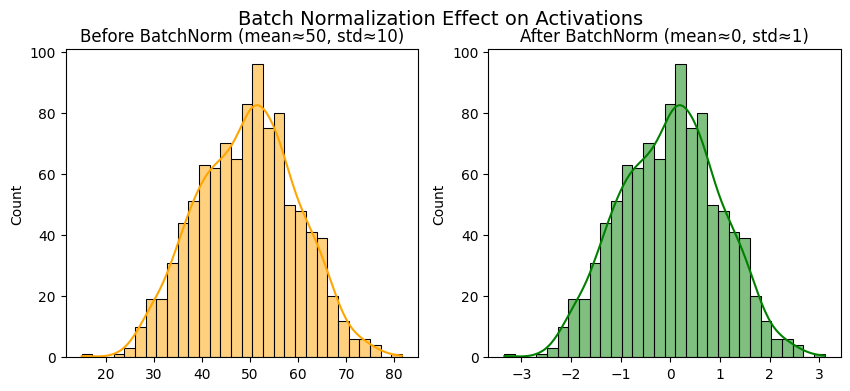

In [8]:
import seaborn as sns
import torch

# Fake raw activations (unscaled, messy)
raw_acts = torch.randn(1000) * 10 + 50   # mean=50, std=10

# BatchNorm applied (mean=0, std=1)
norm_acts = (raw_acts - raw_acts.mean()) / raw_acts.std()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(raw_acts.numpy(), bins=30, kde=True, color="orange")
plt.title("Before BatchNorm (mean≈50, std≈10)")

plt.subplot(1, 2, 2)
sns.histplot(norm_acts.numpy(), bins=30, kde=True, color="green")
plt.title("After BatchNorm (mean≈0, std≈1)")

plt.suptitle("Batch Normalization Effect on Activations", fontsize=14)
plt.show()
